Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']
(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   flo

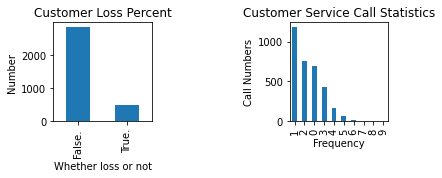

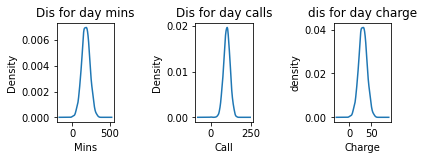

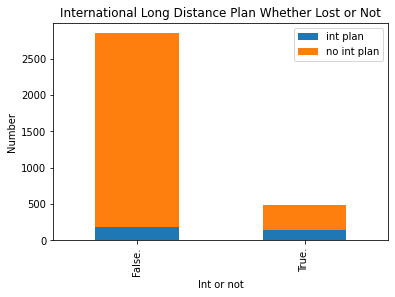

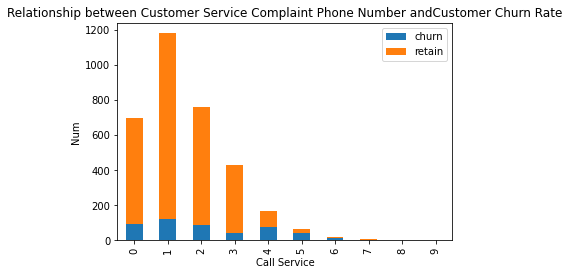

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from Customer_Loss1 import X, y
from sklearn.metrics import classification_report
import pickle

In [2]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123456)
model = LogisticRegression(solver="lbfgs")
model.fit(X_train,y_train)

LogisticRegression()

In [3]:
print(model.coef_)
print(model.intercept_)
print(model.score(X_test,y_test))

[[-0.00537655  0.3295405   0.32993963  0.06945182  0.3312813   0.11135742
  -0.01234763  0.10692494  0.08686333 -0.0141993   0.08611715  0.08561291
  -0.25258687  0.15181457  0.70538973 -0.31257755  0.31257755  0.33693931
  -0.33693931]]
[-2.32059398]
0.858


In [4]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [5]:
print(y_pred[0:5])

[0 0 0 0 0]


In [6]:
print(y_pred_prob[0:5])

[[0.97014814 0.02985186]
 [0.96133513 0.03866487]
 [0.94412531 0.05587469]
 [0.94398438 0.05601562]
 [0.96685891 0.03314109]]


In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       846
           1       0.61      0.22      0.32       154

    accuracy                           0.86      1000
   macro avg       0.74      0.60      0.62      1000
weighted avg       0.83      0.86      0.83      1000



In [8]:
with open('mymodel.logic', 'wb') as f:
    pickle.dump(model, f)

In [13]:
with open('mymodel.logic', 'rb') as f:
    my_model = pickle.load(f)

In [14]:
result = my_model.score(X_test, y_test)
print(result)

0.858
